# Dance to the Music

By: Jason Tellez

Date: 14 October, 2021


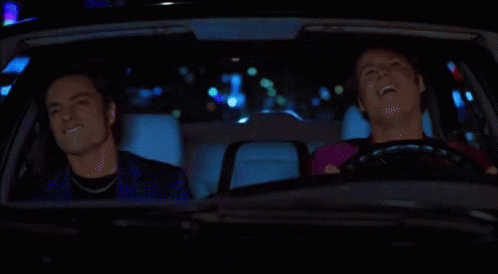

---

### Project Goals:
- Gather data regarding Spotify's top songs worldwide of last portion of 2019
- Investigate and visualize relationships between features and the target variable ("danceability")
- Test hypotheses
    - Create null and alternative hypothesis
    - Test using statistical methods
- Build linear regression machine learning models to predict danceability
- Choose best model and use on out-of-sample-data

### Executive Summary:
- No one feature was the end all be all of drivers, but some were certainly bigger drivers than others
- Despite my intial thoughts, popularity was not the biggest driver of danceability
- The best performing models were K-Nearest Neighbor and Polynomial Regressor
    - KNN Regressor did slightly better and reasonably predicted danceability

## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split


from sklearn.metrics import median_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.neighbors import KNeighborsRegressor

import data_wrangle as dw
import explore as e
import model as m

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Data Wrangling: 
### Acquire

In [2]:
# Acquire the data from the csv and preview some of the columns
df = dw.acquire_data()

In [3]:
df.head(3)

Unnamed: 0   artist_name                                track_name  \
0           0   Post Malone                                   Circles   
1           1  Travis Scott                       HIGHEST IN THE ROOM   
2           2    Juice WRLD  Bandit (with YoungBoy Never Broke Again)   

                 track_id  popularity  danceability  energy  key  loudness  \
0  21jGcNKet2qwijlDFuPiPb          99       0.69500 0.76200    0  -3.49700   
1  3eekarcy7kvN4yt5ZFzltW          98       0.59800 0.42700    7  -8.76400   
2  6Gg1gjgKi2AK4e0qzsR7sd          93       0.47400 0.63100    5  -5.88400   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1      0.03950       0.19200           0.00244   0.08630  0.55300   
1     0      0.03170       0.05460           0.00001   0.21000  0.06050   
2     0      0.34300       0.06870           0.00000   0.13200  0.42500   

      tempo  duration_ms  time_signature  
0 120.04200       215280               4  
1  76.46900       175721               4  
2 180.05100       189323               4

In [4]:
# Get info about df
dw.df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9320 non-null   int64  
 1   artist_name       9320 non-null   object 
 2   track_name        9320 non-null   object 
 3   track_id          9320 non-null   object 
 4   popularity        9320 non-null   int64  
 5   danceability      9320 non-null   float64
 6   energy            9320 non-null   float64
 7   key               9320 non-null   int64  
 8   loudness          9320 non-null   float64
 9   mode              9320 non-null   int64  
 10  speechiness       9320 non-null   float64
 11  acousticness      9320 non-null   float64
 12  instrumentalness  9320 non-null   float64
 13  liveness          9320 non-null   float64
 14  valence           9320 non-null   float64
 15  tempo             9320 non-null   float64
 16  duration_ms       9320 non-null   int64  


count         mean          std         min  \
Unnamed: 0       9320.00000   4659.50000   2690.59659     0.00000   
popularity       9320.00000     50.67564     25.84427     0.00000   
danceability     9320.00000      0.57435      0.20317     0.00000   
energy           9320.00000      0.48614      0.27832     0.00002   
key              9320.00000      5.07618      3.59254     0.00000   
loudness         9320.00000    -11.16500      8.03604   -45.13600   
mode             9320.00000      0.65826      0.47432     0.00000   
speechiness      9320.00000      0.10993      0.11981     0.00000   
acousticness     9320.00000      0.44162      0.38649     0.00000   
instrumentalness 9320.00000      0.20526      0.36219     0.00000   
liveness         9320.00000      0.17080      0.13488     0.02400   
valence          9320.00000      0.43909      0.24410     0.00000   
tempo            9320.00000    117.43812     31.98272     0.00000   
duration_ms      9320.00000 206783.15182 107857.15137 12627.00000   
time_signature   9320.00000      3.85483      0.54840     0.00000   

                          25%          50%          75%           max  
Unnamed: 0         2329.75000   4659.50000   6989.25000    9319.00000  
popularity           43.00000     61.00000     67.00000     100.00000  
danceability          0.42600      0.59600      0.73500       0.98100  
energy                0.22300      0.53900      0.71100       1.00000  
key                   2.00000      5.00000      8.00000      11.00000  
loudness            -16.12925     -7.56400     -5.46375       0.63400  
mode                  0.00000      1.00000      1.00000       1.00000  
speechiness           0.03980      0.05520      0.12400       0.95100  
acousticness          0.06940      0.31150      0.91200       0.99600  
instrumentalness      0.00000      0.00001      0.17300       0.99800  
liveness              0.09700      0.11800      0.18800       0.97900  
valence               0.24100      0.42300      0.61600       0.98700  
tempo                92.02250    116.72300    139.97100     218.36500  
duration_ms      158921.75000 193747.00000 227872.50000 1485747.00000  
time_signature        4.00000      4.00000      4.00000       5.00000

---
### Prepare

In [5]:
# Prep the data
df = dw.prep_data(df)

In [6]:
# get info on new df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   popularity        9320 non-null   int64   
 1   danceability      9320 non-null   float64 
 2   energy            9320 non-null   float64 
 3   key               9320 non-null   int64   
 4   loudness          9320 non-null   float64 
 5   mode              9320 non-null   int64   
 6   speechiness       9320 non-null   float64 
 7   acousticness      9320 non-null   float64 
 8   instrumentalness  9320 non-null   float64 
 9   liveness          9320 non-null   float64 
 10  valence           9320 non-null   float64 
 11  tempo             9320 non-null   float64 
 12  duration_ms       9320 non-null   int64   
 13  time_signature    9320 non-null   int64   
 14  name_length       9320 non-null   int64   
 15  song_name_length  9320 non-null   int64   
 16  minutes           9320 n

In [7]:
df.head(3)

popularity  danceability  energy  key  loudness  mode  speechiness  \
0          99       0.69500 0.76200    0  -3.49700     1      0.03950   
1          98       0.59800 0.42700    7  -8.76400     0      0.03170   
2          93       0.47400 0.63100    5  -5.88400     0      0.34300   

   acousticness  instrumentalness  liveness  ...  time_signature  name_length  \
0       0.19200           0.00244   0.08630  ...               4           11   
1       0.05460           0.00001   0.21000  ...               4           12   
2       0.06870           0.00000   0.13200  ...               4           10   

   song_name_length  minutes  (0, 1]  (1, 2] (2, 3]  (3, 4]  (4, 5]  (5, 25]  
0                 7   (3, 4]       0       0      0       1       0        0  
1                19   (2, 3]       0       0      1       0       0        0  
2                40   (3, 4]       0       0      0       1       0        0  

[3 rows x 23 columns]

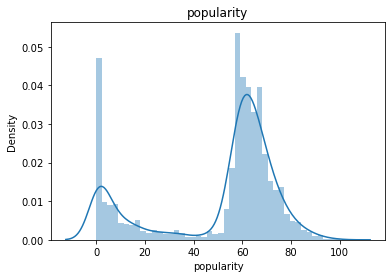

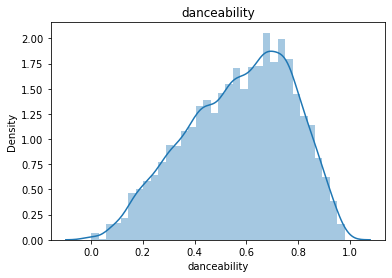

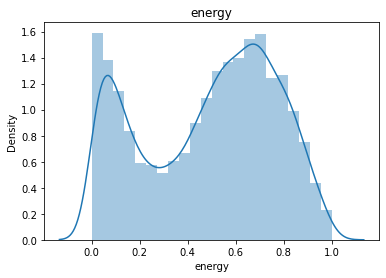

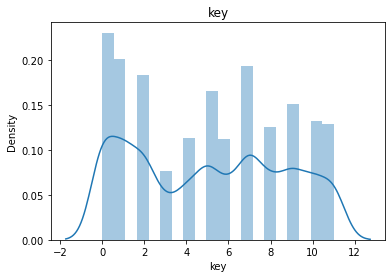

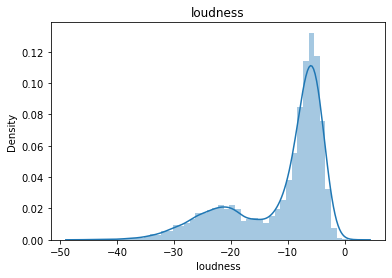

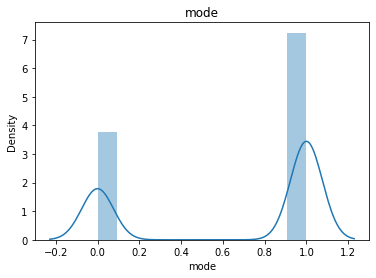

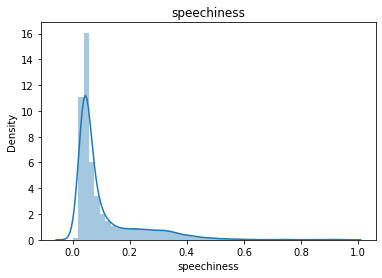

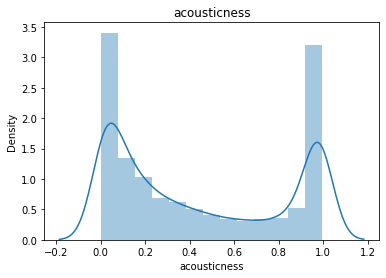

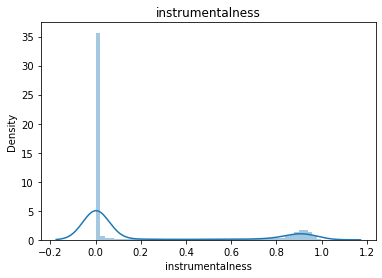

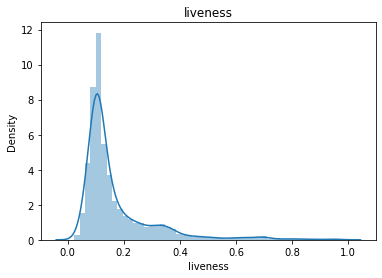

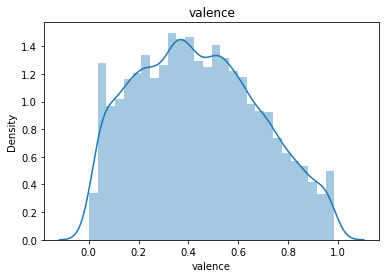

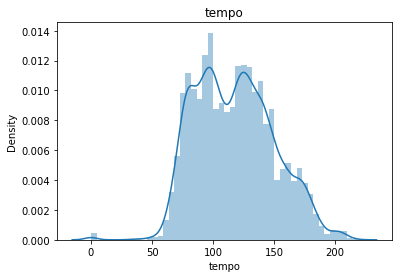

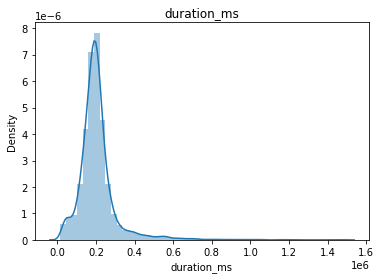

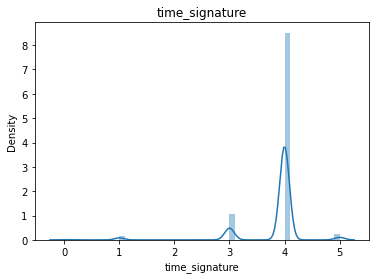

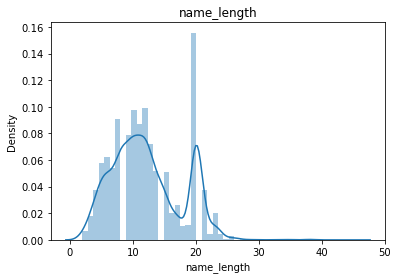

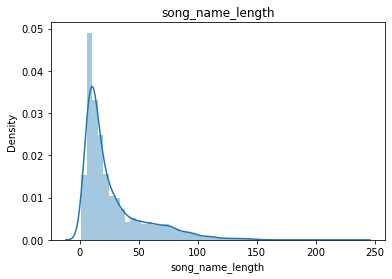

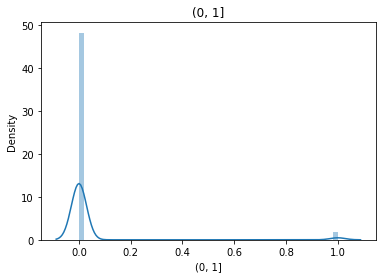

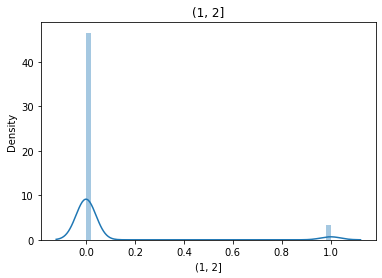

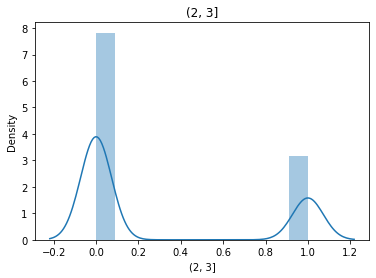

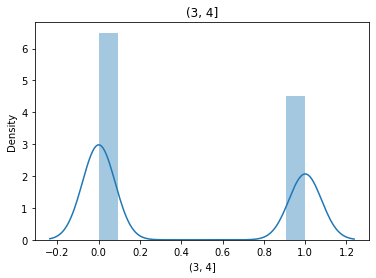

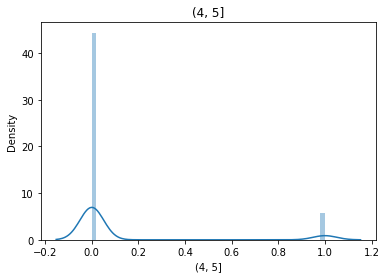

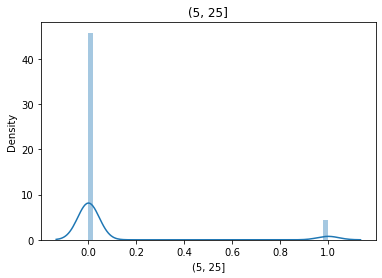

In [8]:
# Visualize the columns
dw.plot_dist(df.drop(columns='minutes'))

In [9]:
# Split the data
train, validate, test = dw.train_validate_test_split(df, seed=117)

In [10]:
print(f'train -> {train.shape}, {round(len(train)/len(df)*100, 2)}%')
print(f'validate -> {validate.shape}, {round(len(validate)/len(df)*100, 2)}%')
print(f'test -> {test.shape}, {round(len(test)/len(df)*100, 2)}%')

train -> (5219, 23), 56.0%
validate -> (2237, 23), 24.0%
test -> (1864, 23), 20.0%


In [11]:
train.head(3)

popularity  danceability  energy  key  loudness  mode  speechiness  \
4012          28       0.27300 0.05580    2 -23.82900     0      0.05140   
1749          73       0.72000 0.86400    0  -3.24900     1      0.20800   
8289          62       0.70700 0.81800    7  -4.89100     1      0.03910   

      acousticness  instrumentalness  liveness  ...  time_signature  \
4012       0.98200           0.95900   0.11800  ...               4   
1749       0.08560           0.00000   0.16000  ...               4   
8289       0.07020           0.00002   0.10500  ...               4   

      name_length  song_name_length  minutes  (0, 1]  (1, 2] (2, 3]  (3, 4]  \
4012           21                53   (3, 4]       0       0      0       1   
1749            4                25   (3, 4]       0       0      0       1   
8289            7                28   (3, 4]       0       0      0       1   

      (4, 5]  (5, 25]  
4012       0        0  
1749       0        0  
8289       0        0  

[3 rows x 23 columns]

---

**Takeaways**

- The data was already cleaned so I didn't drop any nulls
- We started with 9320 rows and 18 columns
    - Ended with 9320 rows and 23 columns
- Dropped artist name, track name, track id, and col that was created from reading csv
    - Cols were dropped because i was not sure how to utilize the cols as is
- Created minutes column (from duration_ms), binned values, created dummy vars and added to original df
- Created two columns carrying lengths of artist_name and track_name values
- Some features have non-normal distributions, so I will have to use non-parametric stats tests
---

## Explore

In [12]:
# scale data for later
scaler, train_scaled, validate_scaled, test_scaled = e.standard_scaler(train, validate, test)

Let's make some quick visualizations to better understand our data!

Text(0.5, 1.0, 'All Columns')

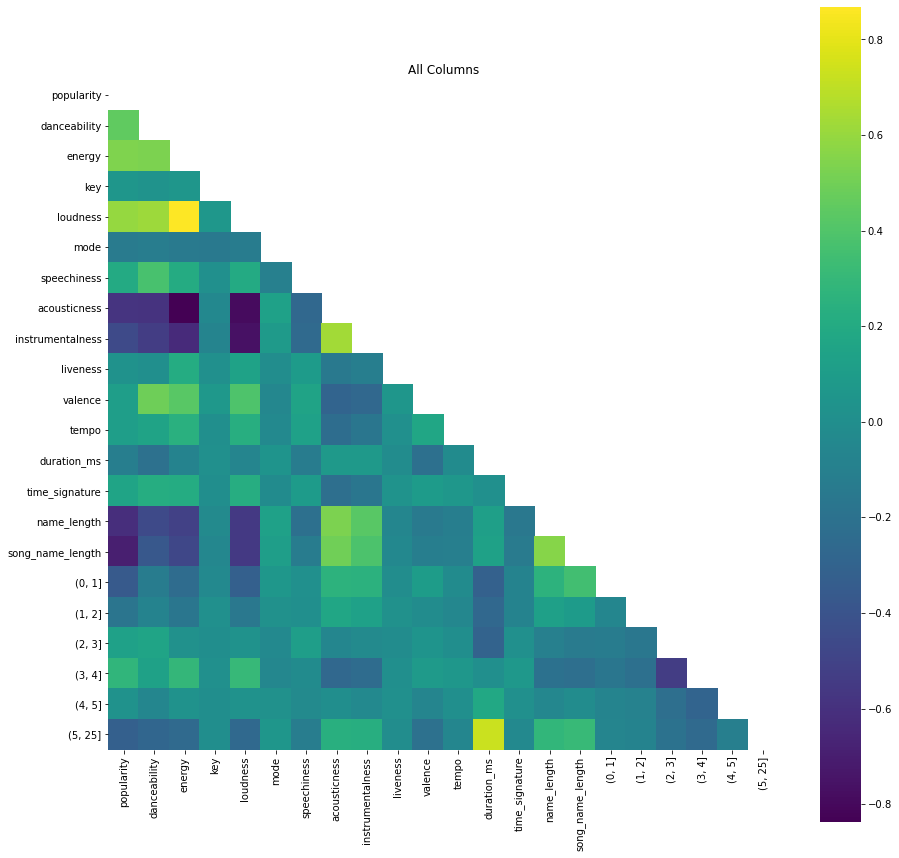

In [13]:
# Heatmap to visualize feature correlations to danceability 
corr = train_scaled.corr()
matrix = np.triu(corr)
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='viridis', square=True, mask=matrix)
plt.title('All Columns')

Text(0.5, 1.0, 'Danceability Only')

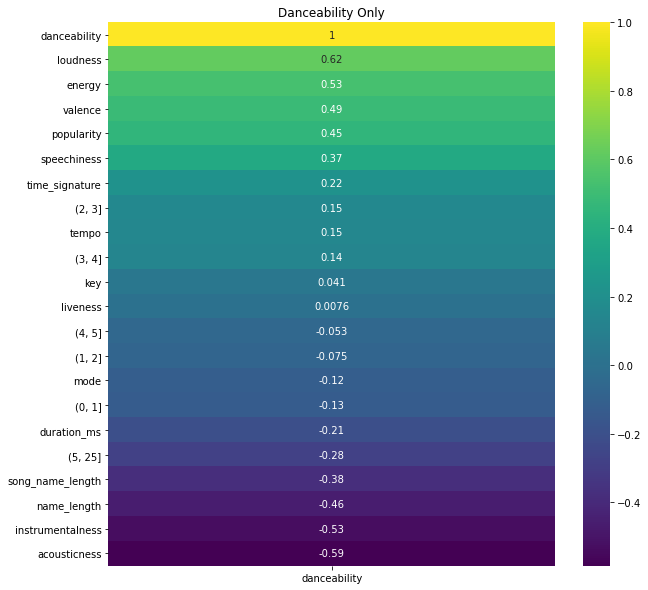

In [14]:
# Heatmap to visualize feature correlations to danceability 
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(train.corr()['danceability'].sort_values(ascending=False)), annot=True, cmap='viridis')
plt.title("Danceability Only")

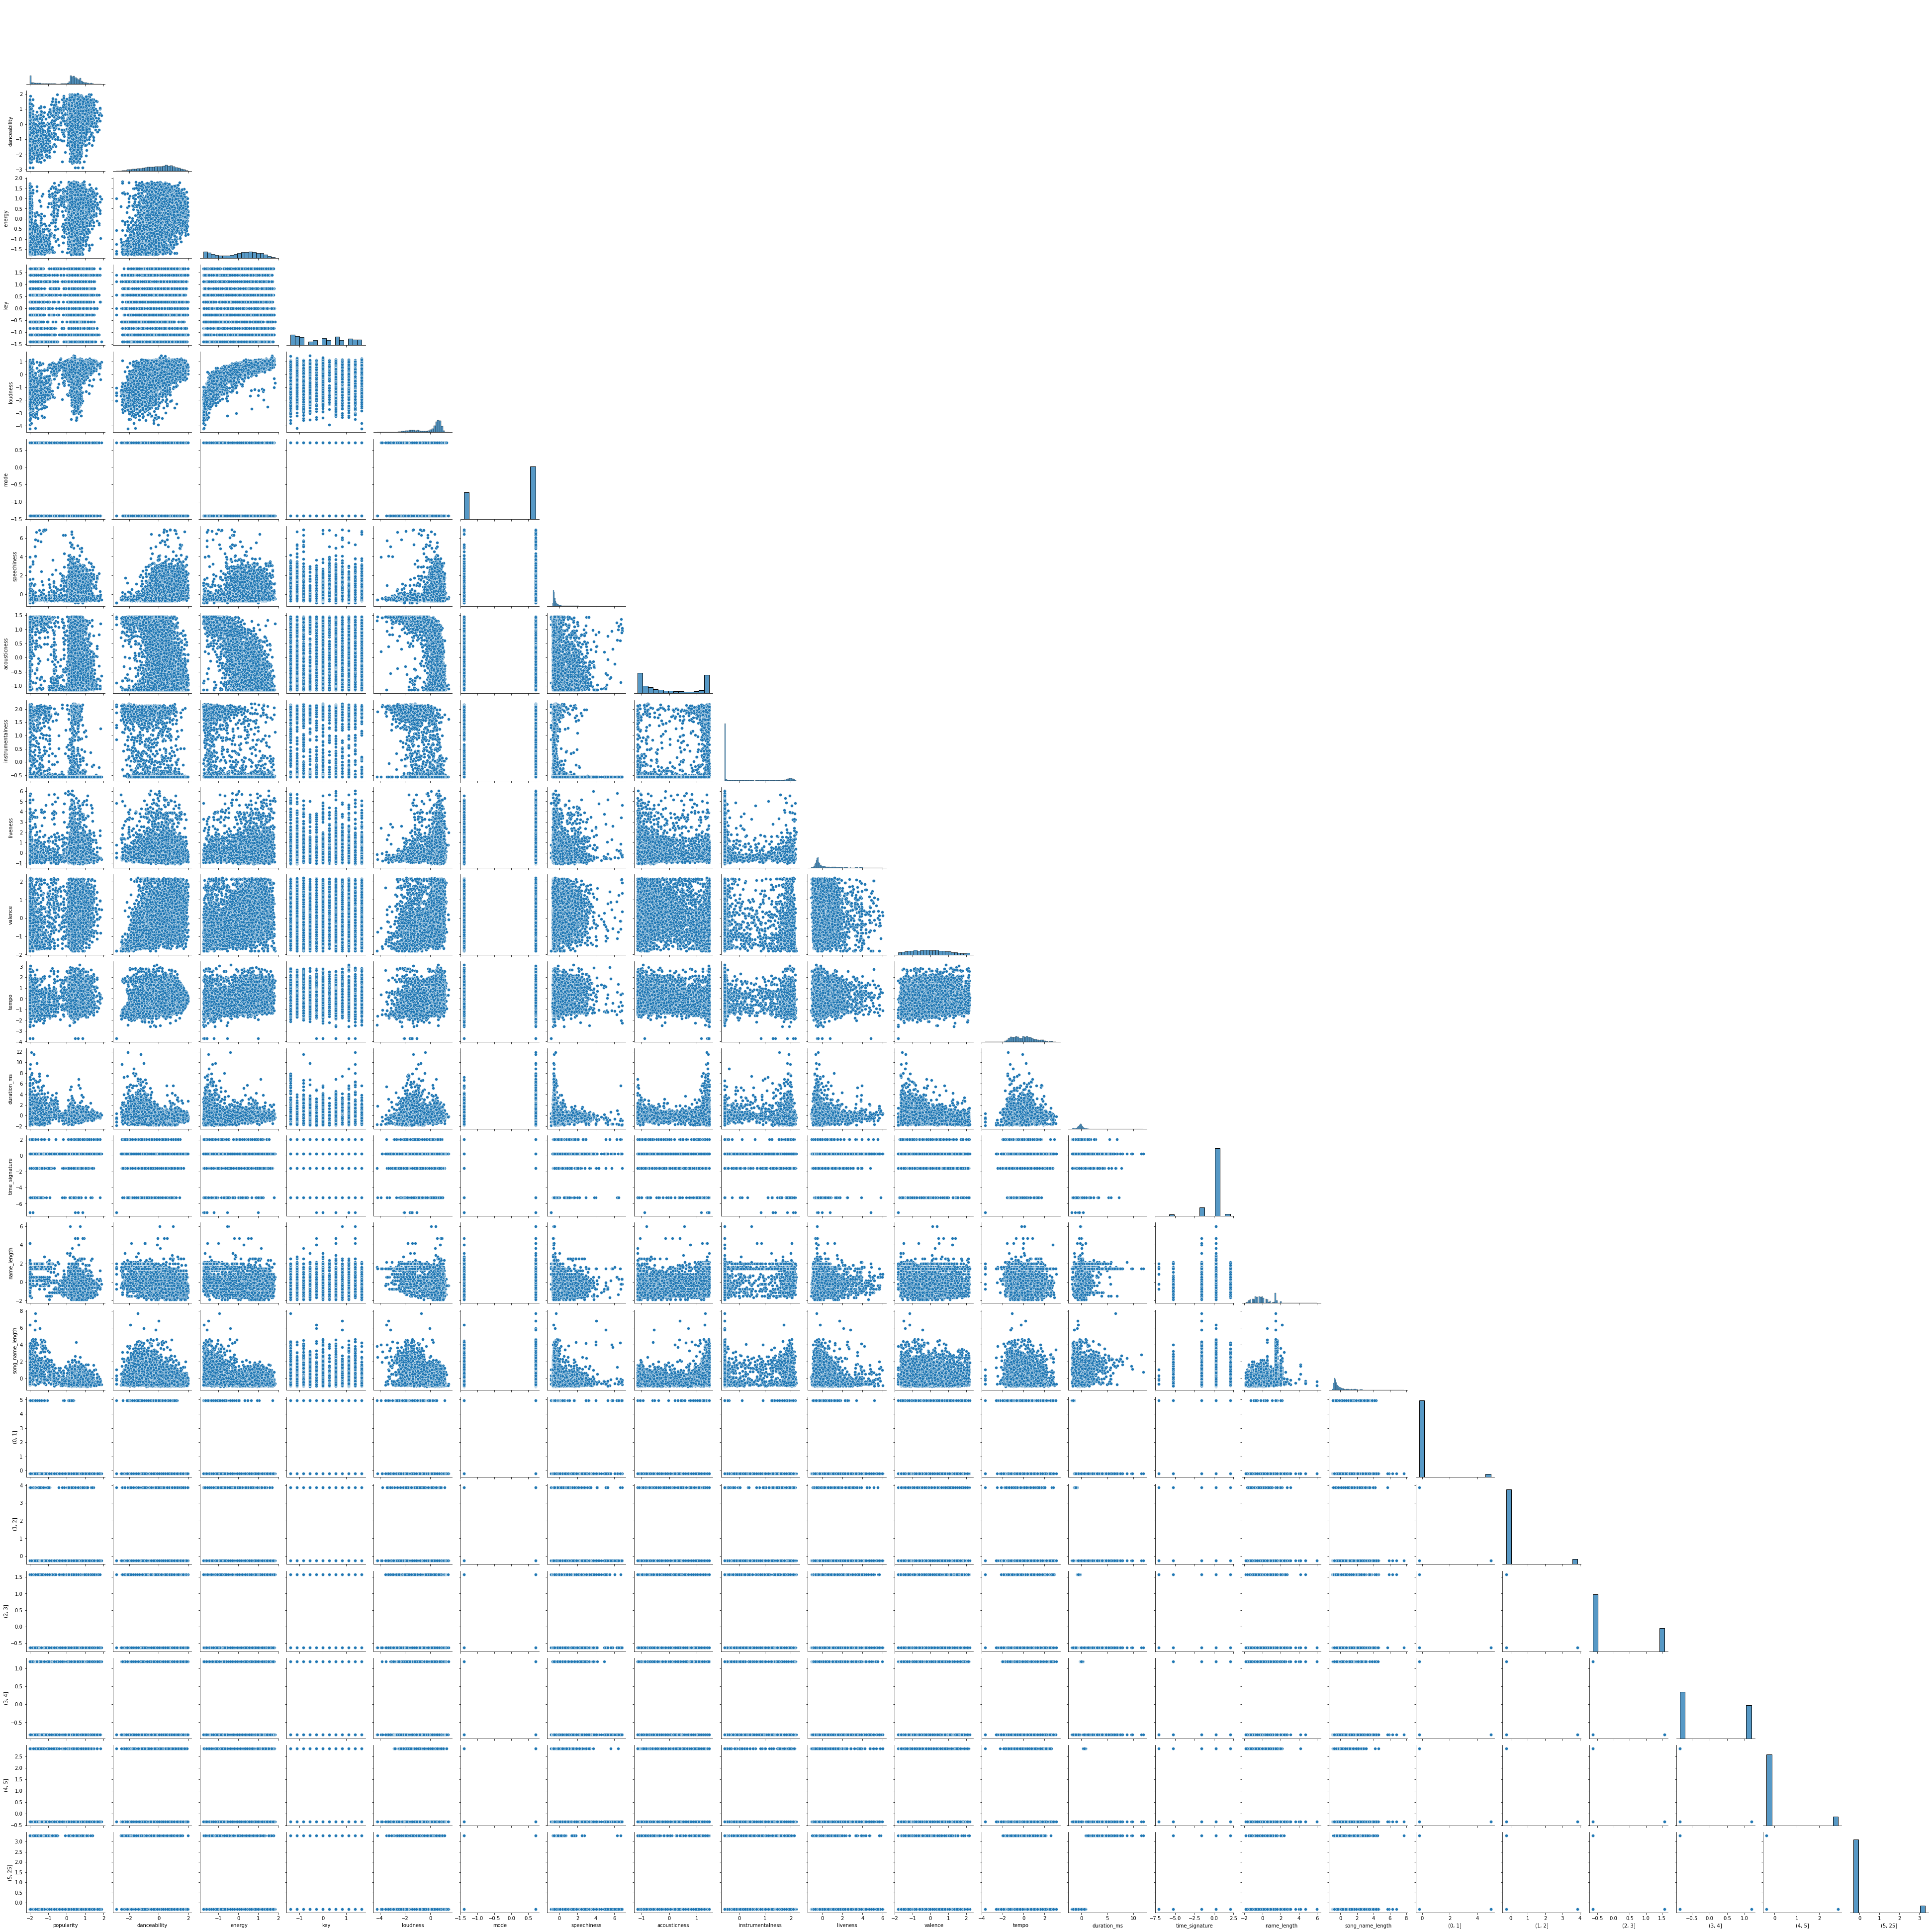

In [15]:
sns.pairplot(train_scaled, corner=True)

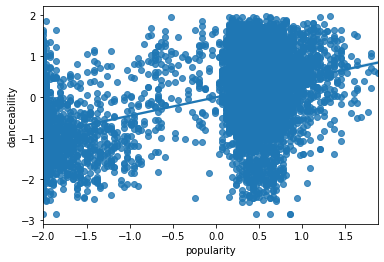

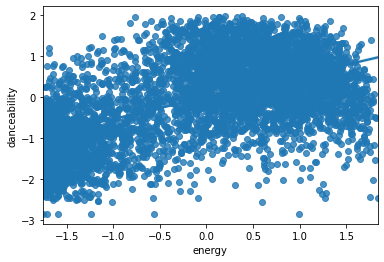

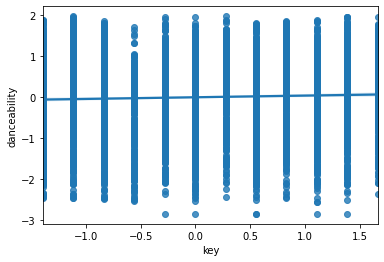

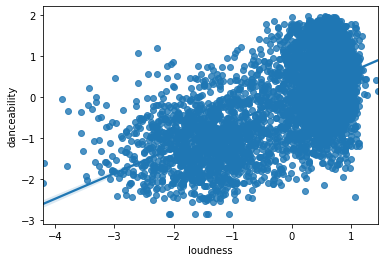

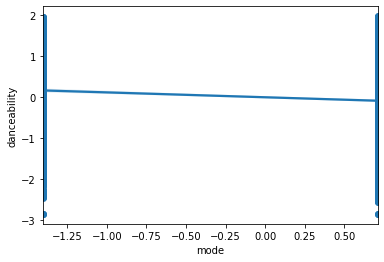

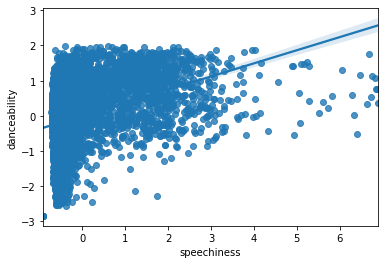

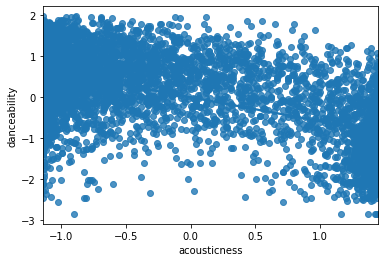

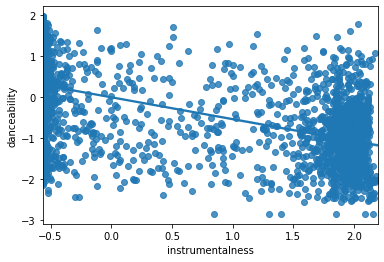

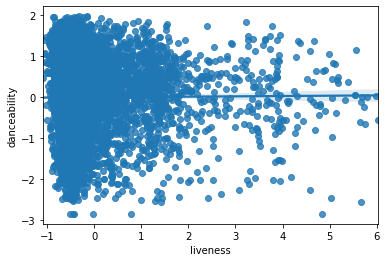

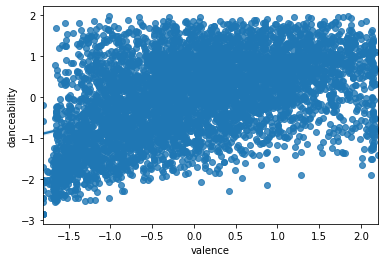

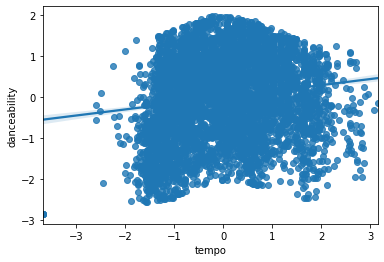

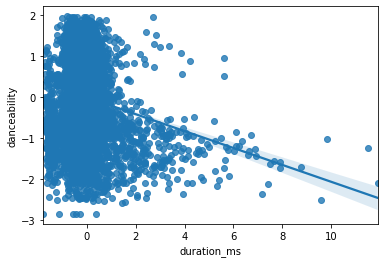

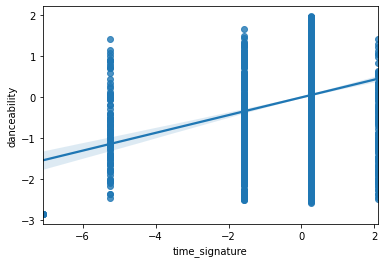

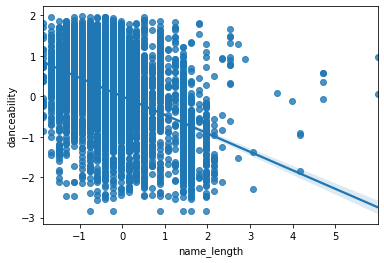

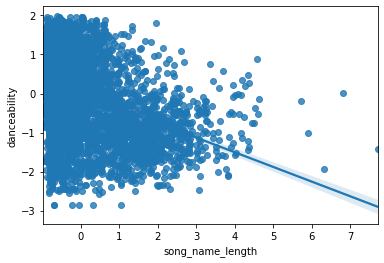

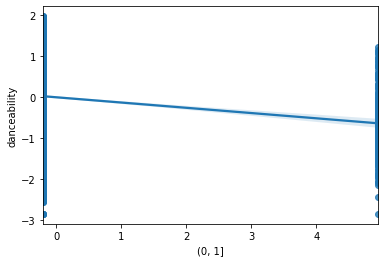

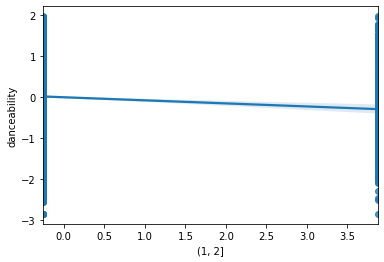

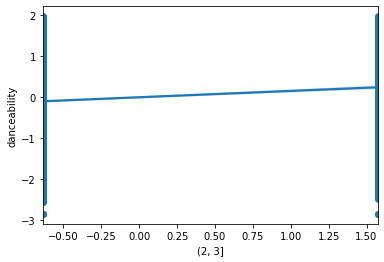

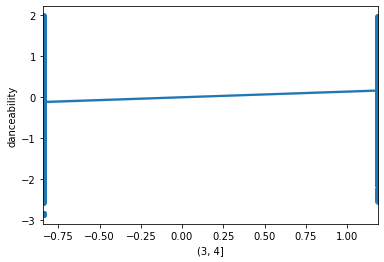

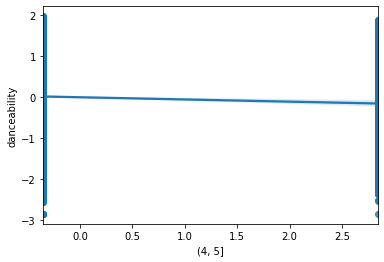

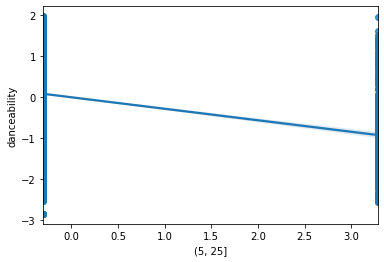

In [16]:
for col in train_scaled.drop(columns='danceability').columns:
    sns.regplot(x=train_scaled[col], y=train_scaled.danceability)
    plt.show()

When visualized with danceability, some features seam to create clusters

In [17]:
train.head(3)

popularity  danceability  energy  key  loudness  mode  speechiness  \
4012          28       0.27300 0.05580    2 -23.82900     0      0.05140   
1749          73       0.72000 0.86400    0  -3.24900     1      0.20800   
8289          62       0.70700 0.81800    7  -4.89100     1      0.03910   

      acousticness  instrumentalness  liveness  ...  time_signature  \
4012       0.98200           0.95900   0.11800  ...               4   
1749       0.08560           0.00000   0.16000  ...               4   
8289       0.07020           0.00002   0.10500  ...               4   

      name_length  song_name_length  minutes  (0, 1]  (1, 2] (2, 3]  (3, 4]  \
4012           21                53   (3, 4]       0       0      0       1   
1749            4                25   (3, 4]       0       0      0       1   
8289            7                28   (3, 4]       0       0      0       1   

      (4, 5]  (5, 25]  
4012       0        0  
1749       0        0  
8289       0        0  

[3 rows x 23 columns]

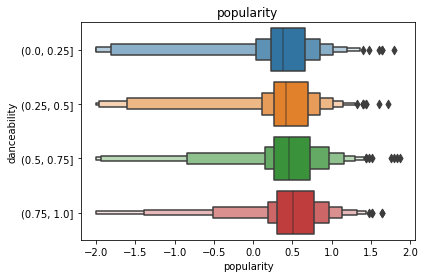

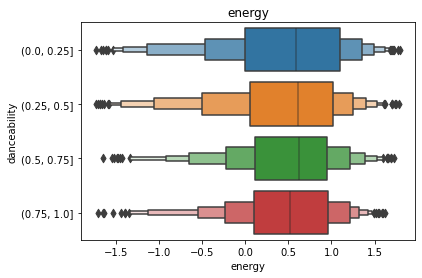

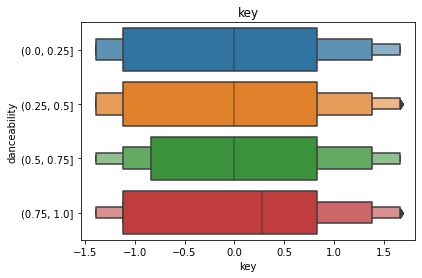

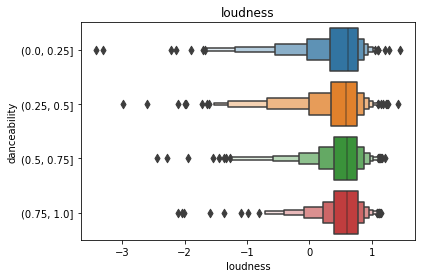

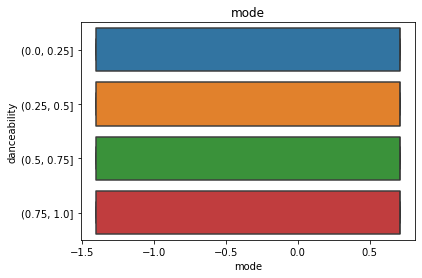

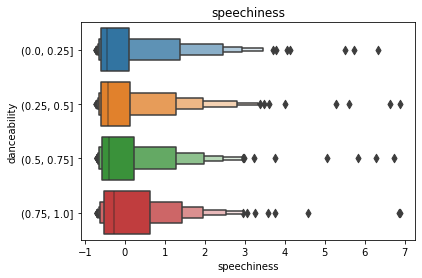

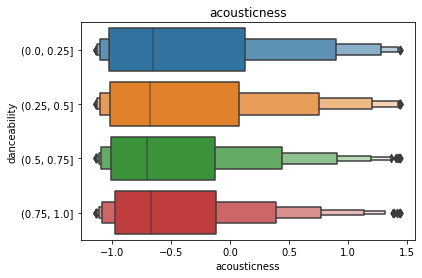

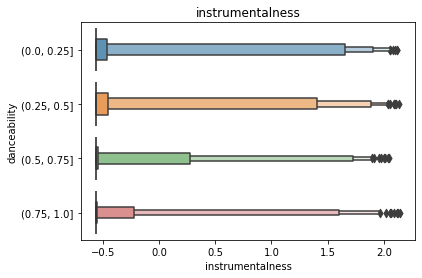

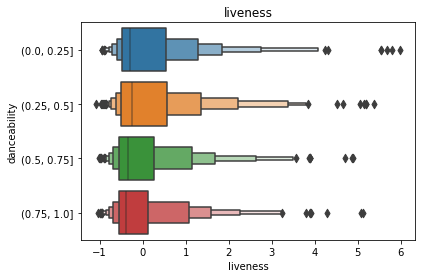

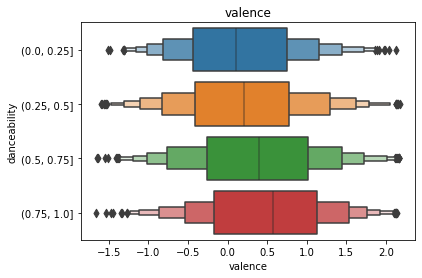

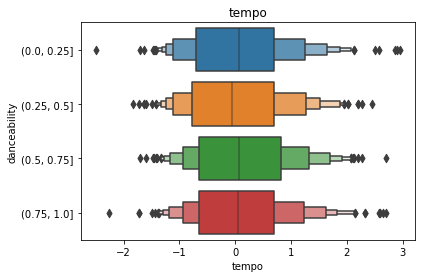

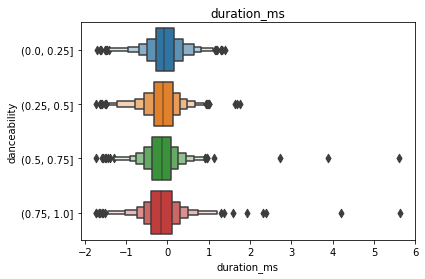

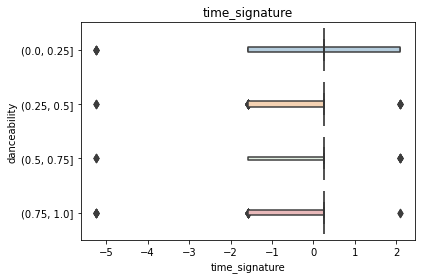

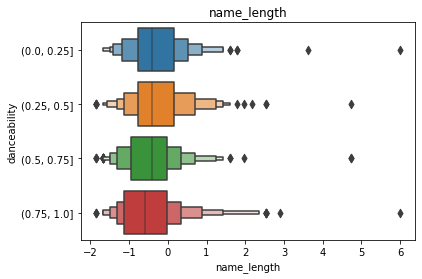

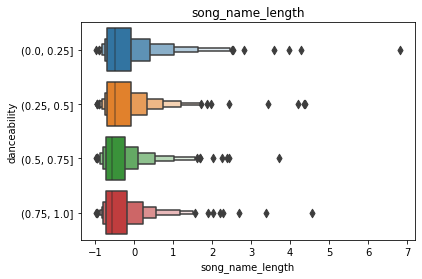

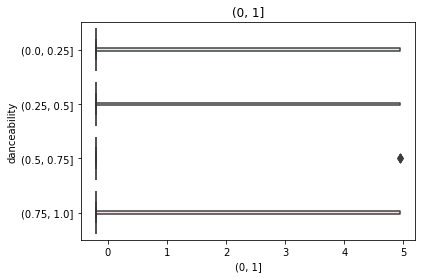

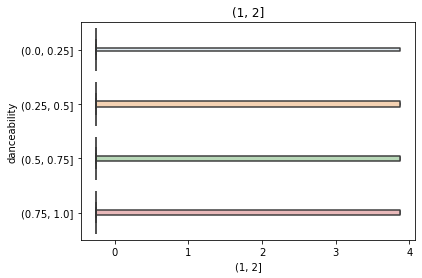

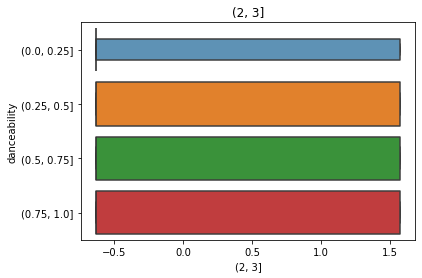

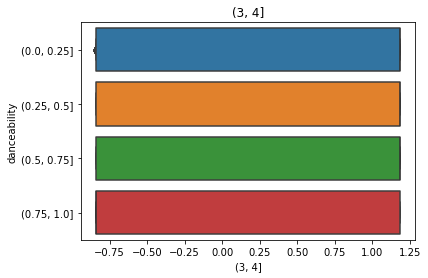

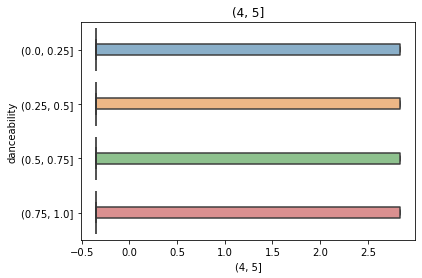

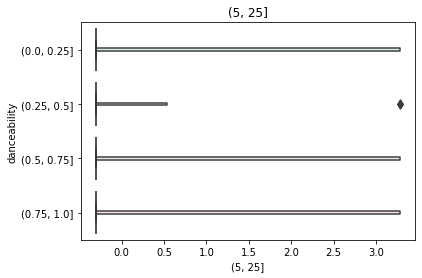

In [18]:
for col in train.drop(columns=['danceability', 'minutes']).columns:
    sns.boxenplot(data=train_scaled, x=col, y=pd.cut(train_scaled.danceability, bins=[0, .25, .5, .75, 1]))
    plt.title(col)
    plt.show()

Features like valence, name-length, and key seem to react more with differences in danceability.

Text(0.5, 1.0, 'Popularity vs. Loudness')

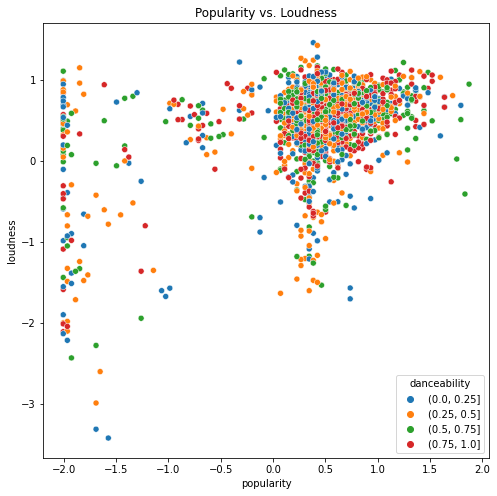

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_scaled, x='popularity', y='loudness', hue=pd.cut(train_scaled.danceability, bins=[0, .25, .5, .75, 1]))
plt.title('Popularity vs. Loudness')

We see.that when visualized together, there are 2 large clusters and a smaller cluster of observations of popularity and loudness

Text(0.5, 1.0, 'Energy vs. Loudness')

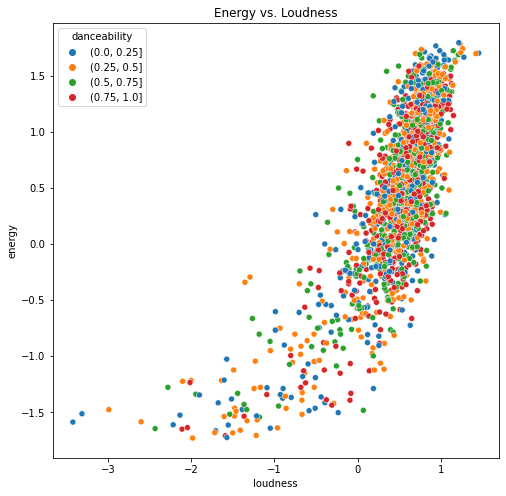

In [20]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_scaled, x='loudness', y='energy', hue=pd.cut(train_scaled.danceability, bins=[0, .25, .5, .75, 1]))
plt.title('Energy vs. Loudness')

We see that there may be a nonlinear, possibly exponential, postitive correlation between Energy and Loudness.

Text(0.5, 1.0, 'Loudness vs. Acousticness')

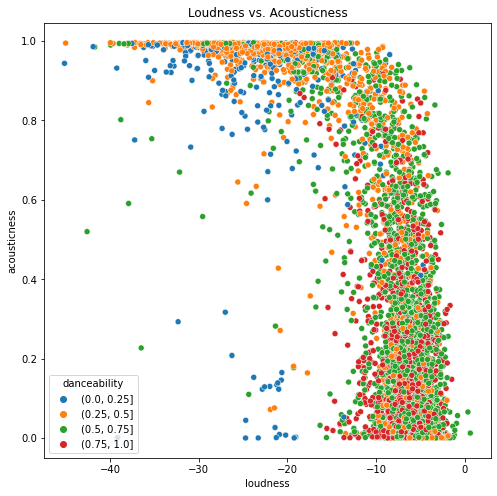

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train, x='loudness', y='acousticness', hue=pd.cut(train.danceability, bins=[0, .25, .5, .75, 1]))
plt.title('Loudness vs. Acousticness')

We see an interesting pattern where loudness and acousticness are negatively and nonlinearly correlated.

Text(0.5, 1.0, 'Artist Name Length vs. Song Name Length')

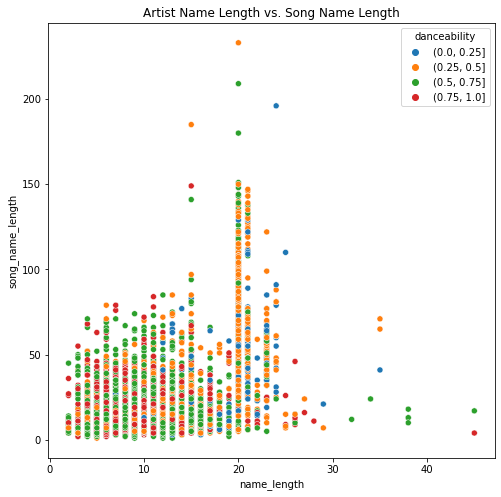

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train, x='name_length', y='song_name_length', hue=pd.cut(train.danceability, bins=[0, .25, .5, .75, 1]))
plt.title('Artist Name Length vs. Song Name Length')

This graph doesnt tell us much, other than most artist names range between 1 and 25 while song names range between 1 and 90 characters.

Neato!

Text(0.5, 1.0, 'Instrumentalness vs. Acousticness')

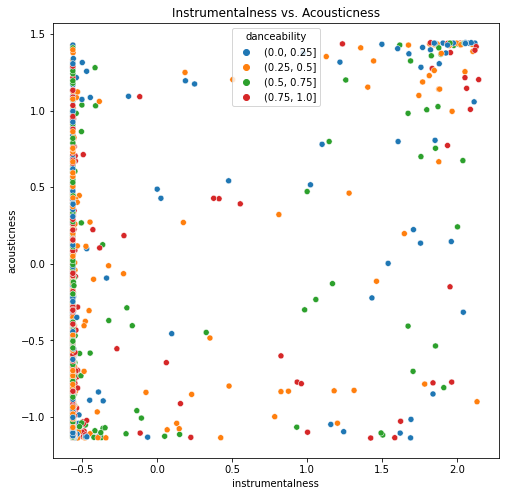

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_scaled, x='instrumentalness', y='acousticness', hue=pd.cut(train_scaled.danceability, bins=[0, .25, .5, .75, 1]))
plt.title('Instrumentalness vs. Acousticness')

We have two noticeable clusters:
- One is located at the top right (high acousticness and instrumentalness)
- One is located at low instrumentalness

Text(0.5, 1.0, 'Instrumentalness vs. Energy')

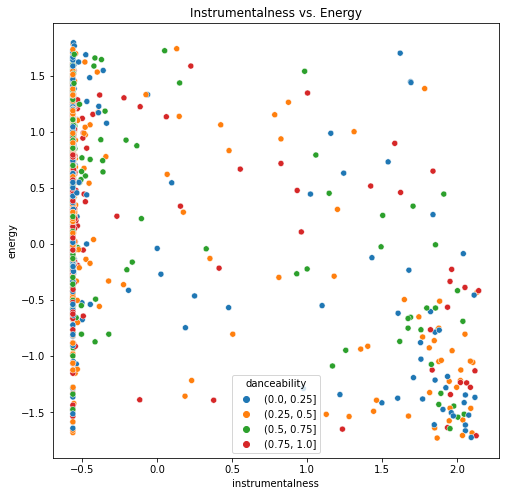

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_scaled, x='instrumentalness', y='energy', hue=pd.cut(train_scaled.danceability, bins=[0, .25, .5, .75, 1]))
plt.title('Instrumentalness vs. Energy')

We have two noticeable clusters:
- One is located at the top right (low energy acousticness and high instrumentalness)
- One is located at low instrumentalness

## Hypothesis Testing

In [25]:
categorical = ["minutes",
              "mode",
              "key",
              "time_signature",]
continuous = ["popularity",
              "energy",
              "loudness",
              "speechiness",
              "acousticness",
              "instrumentalness",
              "liveness",
              "valence",
              "tempo",
              "song_name_length",
              "name_length",
              "duration_ms"]
target = 'danceability'

Set alhpa = 0.05

In [26]:
a = 0.05

#### Spearman R Test
$H_{0}$: There is no correlation
    
$H_{a}$: There is a correlation

In [27]:
for con in continuous:
    rho, pval = stats.spearmanr(train_scaled[con], train_scaled[target])
    if a > pval:
        print('We reject the null hypothesis!')
        print(f'{con} and danceability are correlated')
        print(f'rho = {rho}')
        print(f'p-value = {pval}')
        print('|---------------------------|')
        print()
    else:
        print('We fail to reject the null hypothesis!')
        print(f'{con} and danceability are not correlated')
        print(f'p-value = {pval}')
        print('|---------------------------|')
        print()

We reject the null hypothesis!
popularity and danceability are correlated
rho = 0.35247976497219125
p-value = 1.6012873315699023e-152
|---------------------------|

We reject the null hypothesis!
energy and danceability are correlated
rho = 0.4664624372699864
p-value = 2.522044395435104e-280
|---------------------------|

We reject the null hypothesis!
loudness and danceability are correlated
rho = 0.517288426524049
p-value = 0.0
|---------------------------|

We reject the null hypothesis!
speechiness and danceability are correlated
rho = 0.427974057421432
p-value = 1.6530615263008753e-231
|---------------------------|

We reject the null hypothesis!
acousticness and danceability are correlated
rho = -0.5075777195517815
p-value = 0.0
|---------------------------|

We reject the null hypothesis!
instrumentalness and danceability are correlated
rho = -0.47923059293310427
p-value = 5.8975323926365085e-298
|---------------------------|

We fail to reject the null hypothesis!
liveness and 

---
Takeaways:

- Of the 12 features tested for correlation, one liveness was not correlated to danceability
- From the heatmap created at the beginning of exploration, and the hypothesis testing, nothing appears to be too strongly correlated to danceability
- From the multivariate anaylsis, we saw that some features were correlated to each other (loudness, energy, etc.)
---

## Model

**Let's split the datasets for modeling**

In [28]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.X_y_split(train_scaled, validate_scaled, test_scaled, 'danceability')

In [29]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

### Baseline

Mean predictions had the best performance for the baseline

In [30]:
#danceability mean
mean_baseline = y_train['danceability'].mean()
y_train['mean_baseline'] = mean_baseline
y_validate['mean_baseline'] = mean_baseline

#RMSE of danceability
rmse_train_mean = mean_squared_error(y_train.danceability, y_train.mean_baseline)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate.danceability, y_validate.mean_baseline)**(1/2)

#R^2 Score of mean
r2_baseline_mean = r2_score(y_validate.danceability, y_validate.mean_baseline)

print('             BASELINE')
print('----------------------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_mean, 4), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_mean, 4))

             BASELINE
----------------------------------
RMSE using Mean
Train/In-Sample:  1.0 
Validate/Out-of-Sample:  1.0191


In [31]:
# Get baseline model metrics to compare future models
SSE_baseline, ESS_baseline, TSS_baseline, MSE_baseline, RMSE_baseline = m.regression_errors(y_train, 'danceability', 'mean_baseline')

# Create dataframe to hold and compare metrics
df_baseline_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE', 'R2']), columns=['metric'])
df_baseline_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline, r2_baseline_mean])
df_baseline_eval

metric  baseline_error
0    SSE      5219.00000
1    MSE         1.00000
2   RMSE         1.00000
3     R2        -0.00002

## Feature Selection

In [32]:
# # Find best features to use for future models
X_kbest, X_rfe = m.select_feats(X_train.drop(columns='duration_ms'), 13, y_train.danceability)
X_kbest, X_rfe

(Index([      'popularity',           'energy',         'loudness',
             'speechiness',     'acousticness', 'instrumentalness',
                 'valence',            'tempo',   'time_signature',
             'name_length', 'song_name_length',             (2, 3],
                   (5, 25]],
       dtype='object'),
 Index([      'popularity',           'energy',         'loudness',
             'speechiness',     'acousticness', 'instrumentalness',
                'liveness',          'valence',   'time_signature',
             'name_length',             (3, 4],             (4, 5],
                   (5, 25]],
       dtype='object'))

## OLS

In [33]:
# create the model
ols = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
ols.fit(X_train[X_kbest], y_train['danceability'])

# predict train
y_train['ols_yhat'] = ols.predict(X_train[X_kbest])

# evaluate: danceability
rmse_train = mean_squared_error(y_train['danceability'], y_train['ols_yhat'])**(1/2)

# predict validate
y_validate['ols_yhat'] = ols.predict(X_validate[X_kbest])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['danceability'], y_validate['ols_yhat'])**(1/2)

print("RMSE for OLS\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS
Training/In-Sample:  0.6450609904791877 
Validation/Out-of-Sample:  0.6568824899417565


In [34]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = m.regression_errors(y_train, 'danceability', 'ols_yhat')
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE', 'R2']), columns=['metric'])
df_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline, r2_baseline_mean])

df_eval['ols_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.ols_yhat)])
df_eval

metric  baseline_error  ols_error
0    SSE      5219.00000 2171.64511
1    MSE         1.00000    0.41610
2   RMSE         1.00000    0.64506
3     R2        -0.00002    0.58390

## LassoLars

In [35]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train[X_kbest], y_train['danceability'])

# predict train
y_train['lars_yhat'] = lars.predict(X_train[X_kbest])

# evaluate: danceability
rmse_train = mean_squared_error(y_train['danceability'], y_train['lars_yhat'])**(1/2)

# predict validate
y_validate['lars_yhat'] = lars.predict(X_validate[X_kbest])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['danceability'], y_validate['lars_yhat'])**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1.0 
Validation/Out-of-Sample:  1.0191031016136598


In [36]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = m.regression_errors(y_train, 'danceability', 'lars_yhat')

df_eval['lars/las_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.lars_yhat)])
df_eval

metric  baseline_error  ols_error  lars/las_error
0    SSE      5219.00000 2171.64511      5219.00000
1    MSE         1.00000    0.41610         1.00000
2   RMSE         1.00000    0.64506         1.00000
3     R2        -0.00002    0.58390         0.00000

## Poly Regressor

In [37]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train[X_kbest])

# transform X_validate_scaled
X_validate_degree3 = pf.transform(X_validate[X_kbest])

# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.danceability)

# predict train
y_train['lm3_yhat'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.danceability, y_train.lm3_yhat)**(1/2)

# predict validate
y_validate['lm3_yhat'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.danceability, y_validate.lm3_yhat)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.5663508107386268 
Validation/Out-of-Sample:  0.5700724934731344


In [38]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = m.regression_errors(y_train, 'danceability', 'lm3_yhat')

df_eval['polyr_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.lm3_yhat)])

df_eval

metric  baseline_error  ols_error  lars/las_error  polyr_error
0    SSE      5219.00000 2171.64511      5219.00000   1674.01116
1    MSE         1.00000    0.41610         1.00000      0.32075
2   RMSE         1.00000    0.64506         1.00000      0.56635
3     R2        -0.00002    0.58390         0.00000      0.67925

## KNN Regressor

In [39]:
knr = KNeighborsRegressor(n_neighbors=8,
                          weights='uniform',
                          algorithm='kd_tree',
                          leaf_size=20,
                         )
knr.fit(X_train[X_kbest], y_train.danceability)

# predict train
y_train['knr_yhat'] = knr.predict(X_train[X_kbest])

# evaluate: rmse
rmse_train = mean_squared_error(y_train['danceability'], y_train['knr_yhat'])**(1/2)

# predict validate
y_validate['knr_yhat'] = knr.predict(X_validate[X_kbest])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['danceability'], y_validate['knr_yhat'])**(1/2)

print("RMSE for K-Neighbors Regressor\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for K-Neighbors Regressor
Training/In-Sample:  0.5333392781769776 
Validation/Out-of-Sample:  0.6003181411178404


In [40]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = m.regression_errors(y_train, 'danceability', 'knr_yhat')

df_eval['knr_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.knr_yhat)])
df_eval

metric  baseline_error  ols_error  lars/las_error  polyr_error  knr_error
0    SSE      5219.00000 2171.64511      5219.00000   1674.01116 1484.54865
1    MSE         1.00000    0.41610         1.00000      0.32075    0.28445
2   RMSE         1.00000    0.64506         1.00000      0.56635    0.53334
3     R2        -0.00002    0.58390         0.00000      0.67925    0.71555

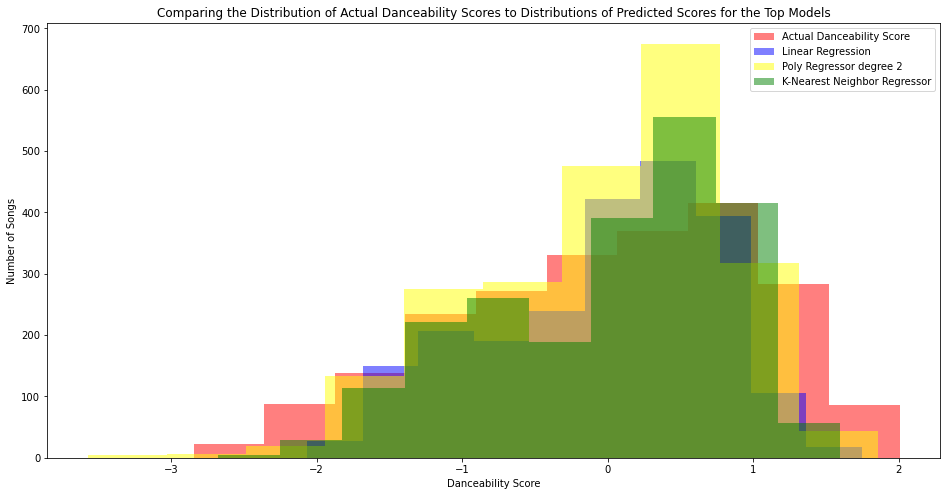

In [41]:
plt.figure(figsize=(16,8))
plt.hist(y_validate.danceability, color='red', alpha=.5, label="Actual Danceability Score")
plt.hist(y_validate.ols_yhat, color='blue', alpha=.5, label="Linear Regression")
plt.hist(y_validate.lm3_yhat, color='yellow', alpha=.5, label="Poly Regressor degree 2")
plt.hist(y_validate.knr_yhat, color='green', alpha=.5, label="K-Nearest Neighbor Regressor")
plt.xlabel("Danceability Score")
plt.ylabel("Number of Songs")
plt.title("Comparing the Distribution of Actual Danceability Scores to Distributions of Predicted Scores for the Top Models")
plt.legend()
plt.show()

K-Nearest Neighbor had the best performance, so we will choose it as our top model.

## Evaluate on Test

In [42]:
# Convert y_test to dataframe for testing
y_test = pd.DataFrame(y_test)

# Fit the model
knr.fit(X_test[X_kbest], y_test.danceability)

# predict
y_test['knr_yhat'] = knr.predict(X_test[X_kbest])

# evaluate: rmse
rmse_test = mean_squared_error(y_test['danceability'], y_test['knr_yhat'])**(1/2)

print("RMSE for K-Neighbor Regressor\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
      "\nTest/Out-of-Sample: ", rmse_test)

RMSE for K-Neighbor Regressor
Training/In-Sample:  0.5333392781769776 
Validation/Out-of-Sample:  0.6003181411178404 
Test/Out-of-Sample:  0.556685071966608


In [43]:
# Compare KNR model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = m.regression_errors(y_validate, 'danceability', 'knr_yhat')

df_eval['val_error'] = np.array([SSE, MSE, RMSE, r2_score(y_validate.danceability, y_validate.knr_yhat)])

In [44]:
# Compare KNR model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = m.regression_errors(y_test, 'danceability', 'knr_yhat')

df_eval['test_error'] = np.array([SSE, MSE, RMSE, r2_score(y_test.danceability, y_test.knr_yhat)])
df_eval[['metric', 'baseline_error', 'knr_error', 'val_error', 'test_error']]

metric  baseline_error  knr_error  val_error  test_error
0    SSE      5219.00000 1484.54865  806.17424   577.65037
1    MSE         1.00000    0.28445    0.36038     0.30990
2   RMSE         1.00000    0.53334    0.60032     0.55669
3     R2        -0.00002    0.71555    0.65299     0.69091

---

## Conclusions

#### Takeaways

My best models Were the Polynomial Regressor (Degree 2) and the K Nearest Neighbor Regressor. I ultimately chose the KNN Regressor since it performed slightly better then the Polynomial Regressor.

---

Parameters used:

    - n_neighbors=8
    - weights='uniform'
    - algorithm='kd_tree'
    - leaf_size=20

Features used:

    - popularity
    - energy
    - loudness
    - speechiness
    - acousticness
    - instrumentalness
    - valence
    - tempo
    - time_signature
    - name_length
    - song_name_length
    - (2, 3]
    - (5, 25]
    
Metrics for the above features:

train metrics: RMSE = 0.53334, R^2 = 0.71555
\
validate metrics: RMSE = 0.60032, R^2 = 0.55669
\
test_error: RMSE = 0.65299, R^2 = 0.69091

---
    
- Most characteristics of danceability are correlated but none were strongly correlated enough to single-handedly predict danceability
- I was a little surprised that popularity did not appear to be the biggest driver of danceability
- Loudness was the biggest driver of danceability but not by much
- Artist name length and song name length was had was surpisngly stronger predictor than anticipated


#### Next Steps

Given more time, I would've wanted to:
- create clusters to increase the accuaracy of my models
- find genres of the songs and include that as a feature
- see if the number of features on a song help predict danceability
- determine if the number of "unique" words spoken could act as a predictor